import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


Dataset read and preprocessing

In [3]:
dataset=pd.read_csv('abalone.csv')
dataset

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [18]:
# don't need first index('id') and index "Rings" -> label
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values



In [19]:
print(x)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [20]:
print(y)

[15  7  9 ...  9 10 12]


In [24]:
# index "Sex" need to Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 0.2245 0.101 0.15]
 [1.0 0.0 0.0 ... 0.0995 0.0485 0.07]
 [0.0 1.0 0.0 ... 0.2565 0.1415 0.21]
 ...
 [1.0 0.0 0.0 ... 0.5255 0.2875 0.308]
 [0.0 1.0 0.0 ... 0.531 0.261 0.296]
 [1.0 0.0 0.0 ... 0.9455 0.3765 0.495]]


In [44]:
print(x.shape)

(4177, 11)


In [25]:
# split test and train set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=12)

Linear Regression

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [28]:
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 4.59498778256503


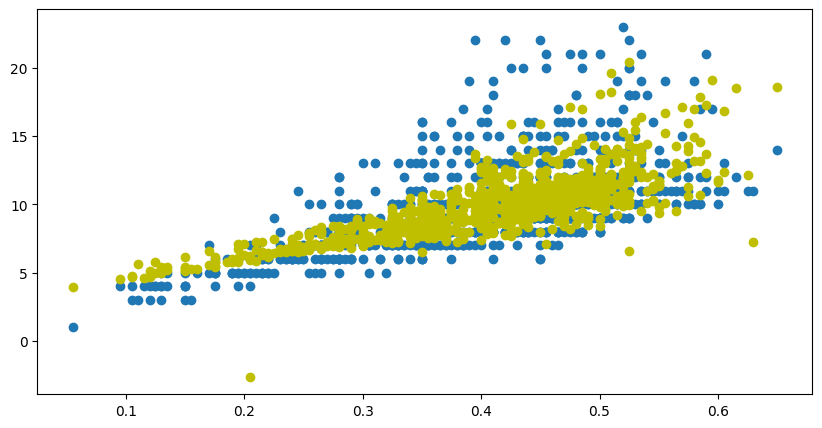

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

Decision Tree Regression

In [32]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [33]:
print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 8.687799043062201


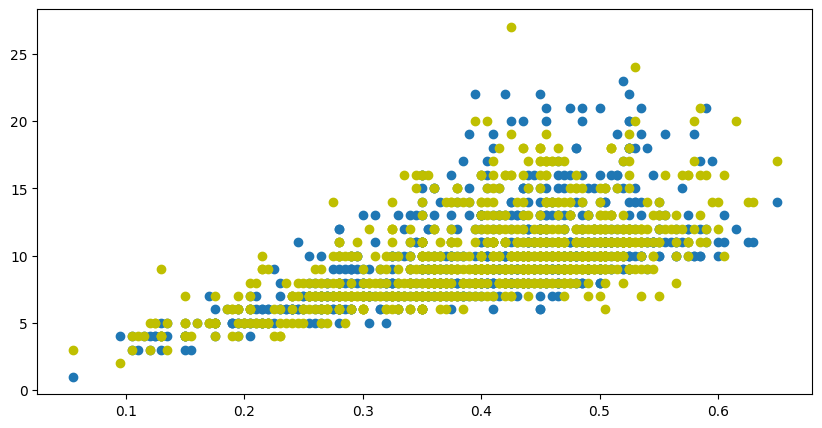

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

Random Forest Regression

In [35]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [36]:
print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 4.45897105263158


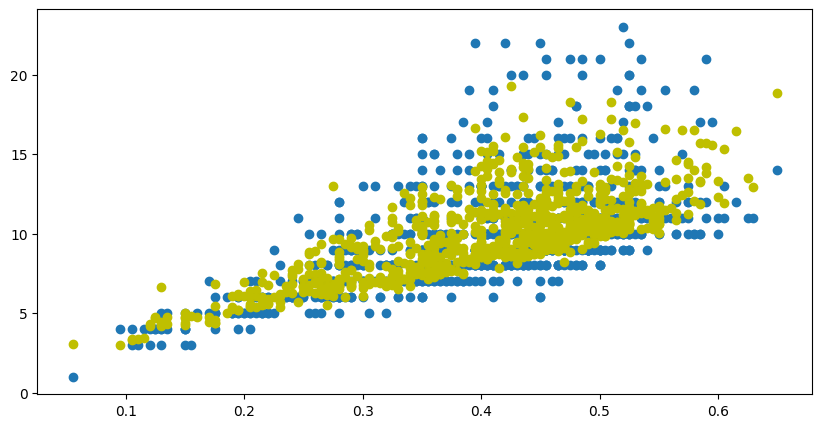

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

Support Vector Machine Regression

In [38]:
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

In [39]:
print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 5.223152429088209


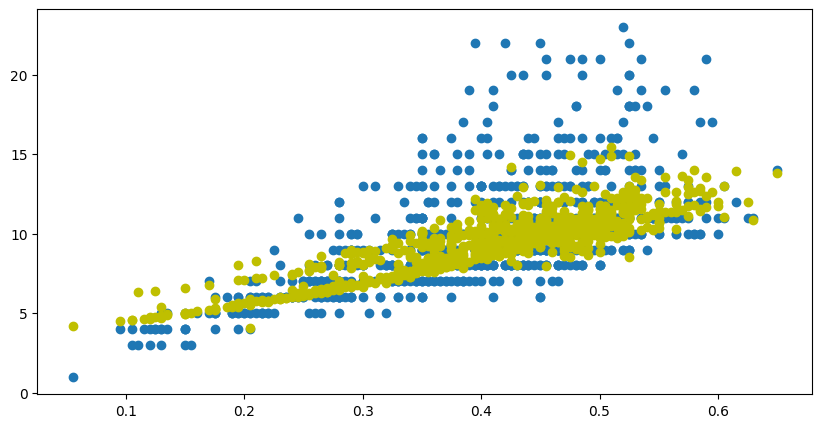

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

KNN Regression

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [42]:
print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 4.749234449760759


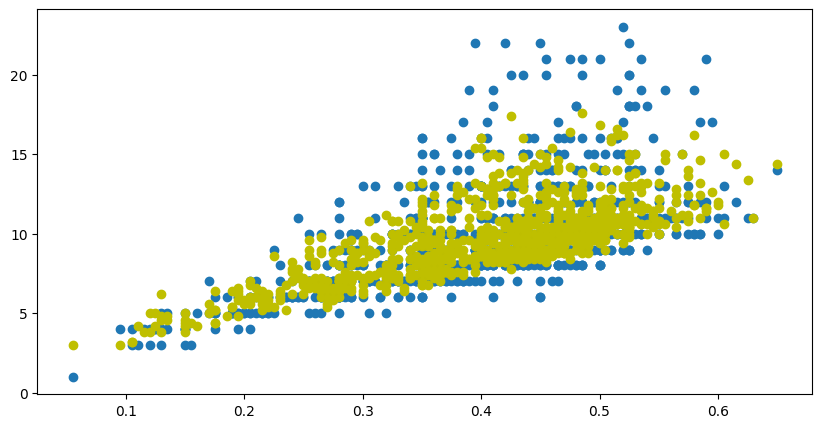

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

Deep Learning

In [45]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(12,activation="tanh"),
    layers.Dense(12,activation="tanh"),
    layers.Dense(1)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [55]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [52]:
history=model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 27s 261ms/step - loss: 21.6840 - mse: 21.6840 - val_loss: 16.4931 - val_mse: 16.4931
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.1240 - mse: 15.1240 - val_loss: 12.8941 - val_mse: 12.8941
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.9166 - mse: 10.9166 - val_loss: 11.2964 - val_mse: 11.2964
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6333 - mse: 10.6333 - val_loss: 10.4126 - val_mse: 10.4126
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4903 - mse: 9.4903 - val_loss: 9.3874 - val_mse: 9.3874
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6993 - mse: 8.6993 - val_loss: 8.1244 - val_mse: 8.1244
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7452 - mse: 7.7452 - val_loss: 7.5570 - val_mse: 7.5570
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2624 - mse: 7.2624 - val_loss: 7.2712 - val_mse: 7.2712
Epoch 9/30
105/105 ━━━━━━━━━━━━━━━━━━

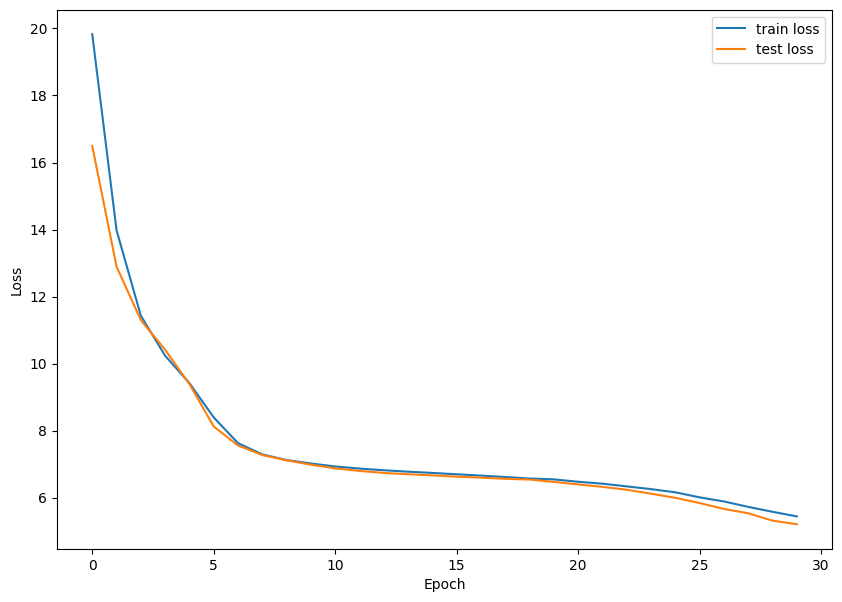

In [53]:
plt.figure(figsize=(10,7))
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
model.evaluate(x_test, y_test)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2538 - mse: 5.2538


[5.207219123840332, 5.207219123840332]